In [2]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
# grid search: set different ranges of parameters
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler # normalizations
from imblearn.over_sampling import SMOTE # imbalance dataset
# DecisionTreeClassifier, ,plot tree,export tree
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text,export_graphviz 
import graphviz # draw plot
from sklearn.ensemble import RandomForestClassifier


# PART I: wine dataset

## 1. load data

In [76]:
#Columns/Features
# D: all feat, L: used for a new feat col
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("./winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("./winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_r= wine_r.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r]) # get all data for classification

## 2. explore & describe data

In [77]:
# describe the overiew of data
print(f'Data: shape={wine[DL].shape}')
display(wine[DL].describe())
display(wine[DL].head())

Data: shape=(6497, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [78]:
wine[C]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1594    1.0
1595    1.0
1596    1.0
1597    1.0
1598    1.0
Name: color, Length: 6497, dtype: float64

## 3. cleanse abnormal and address null data

In [79]:
wine.isnull().sum()
# no null data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [80]:
# check abnormal max/min val
i = 0
for col in wine.columns:
    if col != 'color':
        i+=1; print('*'*10 + str(i) + col + '*'*10)
        wx = wine[wine.columns[3]].sort_values(ascending=False)
        print(pd.concat([wx.head(10), wx.tail(10)]))
# wine = wine.drop(index=2781)      

**********1fixed acidity**********
2781    65.80
1663    31.60
1653    31.60
3623    26.05
3619    26.05
1608    23.50
4480    22.60
182     22.00
191     22.00
444     20.80
3526     0.80
3409     0.70
2754     0.70
2888     0.70
2936     0.70
2587     0.70
2934     0.70
4682     0.70
2039     0.60
2045     0.60
Name: residual sugar, dtype: float64
**********2volatile acidity**********
2781    65.80
1663    31.60
1653    31.60
3623    26.05
3619    26.05
1608    23.50
4480    22.60
182     22.00
191     22.00
444     20.80
3526     0.80
3409     0.70
2754     0.70
2888     0.70
2936     0.70
2587     0.70
2934     0.70
4682     0.70
2039     0.60
2045     0.60
Name: residual sugar, dtype: float64
**********3citric acid**********
2781    65.80
1663    31.60
1653    31.60
3623    26.05
3619    26.05
1608    23.50
4480    22.60
182     22.00
191     22.00
444     20.80
3526     0.80
3409     0.70
2754     0.70
2888     0.70
2936     0.70
2587     0.70
2934     0.70
4682     0.70
2039    

## 4. select features to be used

In [81]:
stats = {
    "Max": wine.max(),
    "Min": wine.min(),
    "Mean": wine.mean(),
    "Median": wine.median(),
    "Variance": wine.var(),
    "Skewness": wine.skew(),
    "Kurtosis": wine.kurtosis()
}

stats_table = pd.DataFrame(stats)
stats_table

Max      Min        Mean     Median     Variance  \
fixed acidity          15.90000  3.80000    7.215307    7.00000     1.680740   
volatile acidity        1.58000  0.08000    0.339666    0.29000     0.027105   
citric acid             1.66000  0.00000    0.318633    0.31000     0.021117   
residual sugar         65.80000  0.60000    5.443235    3.00000    22.636696   
chlorides               0.61100  0.00900    0.056034    0.04700     0.001227   
free sulfur dioxide   289.00000  1.00000   30.525319   29.00000   315.041192   
total sulfur dioxide  440.00000  6.00000  115.744574  118.00000  3194.720039   
density                 1.03898  0.98711    0.994697    0.99489     0.000009   
pH                      4.01000  2.72000    3.218501    3.21000     0.025853   
sulphates               2.00000  0.22000    0.531268    0.51000     0.022143   
alcohol                14.90000  8.00000   10.491801   10.30000     1.422561   
quality                 9.00000  3.00000    5.818378    6.00000     0.762575   
color                   1.00000  0.00000    0.246114    0.00000     0.185570   

                      Skewness   Kurtosis  
fixed acidity         1.723290   5.061161  
volatile acidity      1.495097   2.825372  
citric acid           0.471731   2.397239  
residual sugar        1.435404   4.359272  
chlorides             5.399828  50.898051  
free sulfur dioxide   1.220066   7.906238  
total sulfur dioxide -0.001177  -0.371664  
density               0.503602   6.606067  
pH                    0.386839   0.367657  
sulphates             1.797270   8.653699  
alcohol               0.565718  -0.531687  
quality               0.189623   0.232322  
color                 1.179095  -0.609922

/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


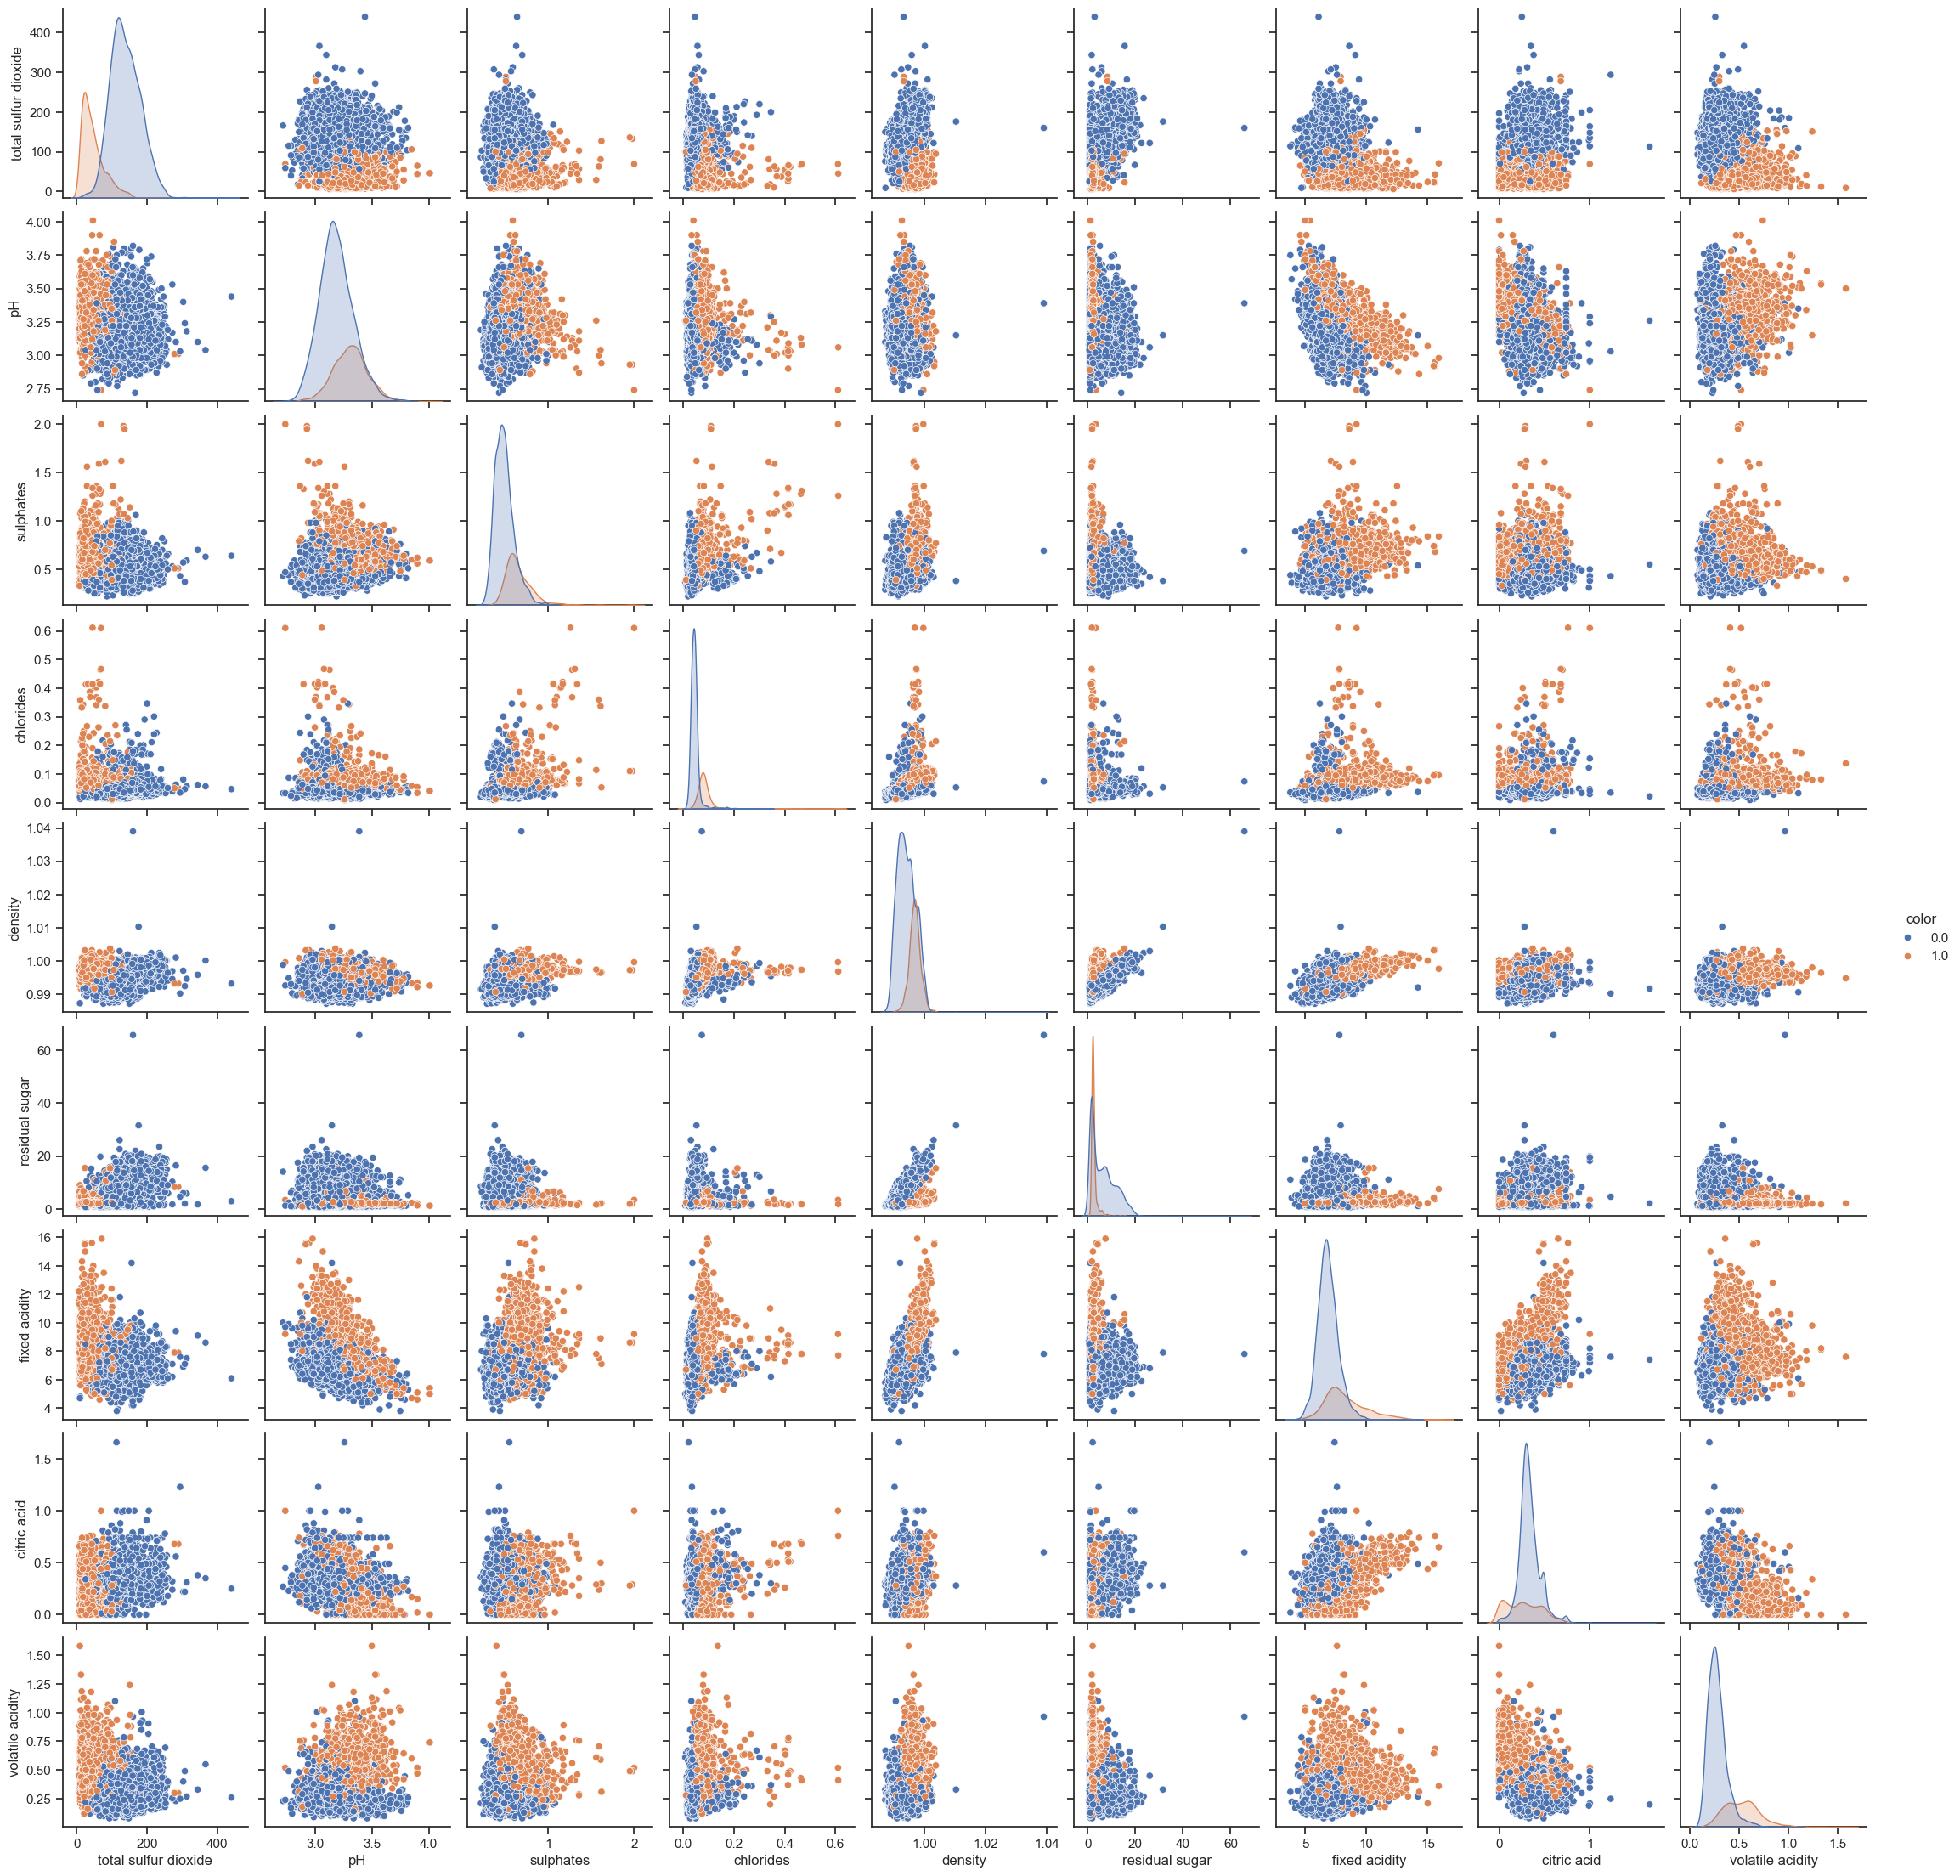

In [82]:
# plot pairsplot to see feature relations
# pairplot_feat = ['fixed acidity','volatile acidity','total sulfur dioxide','pH','color']
# pairplot_feat = list(wine.columns)
pairplot_feat = ['total sulfur dioxide', 'pH', 'sulphates', 'chlorides', 'density', 'residual sugar', 'fixed acidity', 'citric acid', 'volatile acidity','color']

sampled_data = wine.sample(
                        frac=1, # randomly use part of data
                           random_state=42)[pairplot_feat]
display(sns.pairplot(sampled_data, hue = 'color'))

In [83]:
# remove some feats, R is None meaning reserve all features
R = [
    # 'chlorides',
     # 'density',
    # 'total sulfur dioxide'
]
DL_used = [feat for feat in DL if feat not in R]
X_used, y = wine[DL_used], np.ravel(wine[C]) #labels (color)
print(f'Data: shape={X_used.shape}')
print(f'Labels: shape={y.shape}')

Data: shape=(6497, 12)
Labels: shape=(6497,)


## 5. normalize features

In [84]:
# normalizations
# 0. no normalization
# X = X_used
# 1. minmax normalization
# scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(X_used), columns=DL_used)
# 2. z-score normalization
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_used), columns=DL_used)

## 6. Create Train/Test Split 

In [85]:
ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

## 7. check & address data imbalance

In [86]:
# # is balanced data?

# print(wine[C].value_counts())

# print(y.value_counts())

# balance has negative effect
# smote = SMOTE(random_state=42,sampling_strategy=0.8)
# X_train, y_train = smote.fit_resample(X_train, y_train)

## 8. cross validation & get best k

### 8.1 KNN

In [87]:
# k-fold cross validation and get best super-paramater
k_values = range(1,31)
cv_scores = []
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print('best_k = ', best_k)

best_k =  6


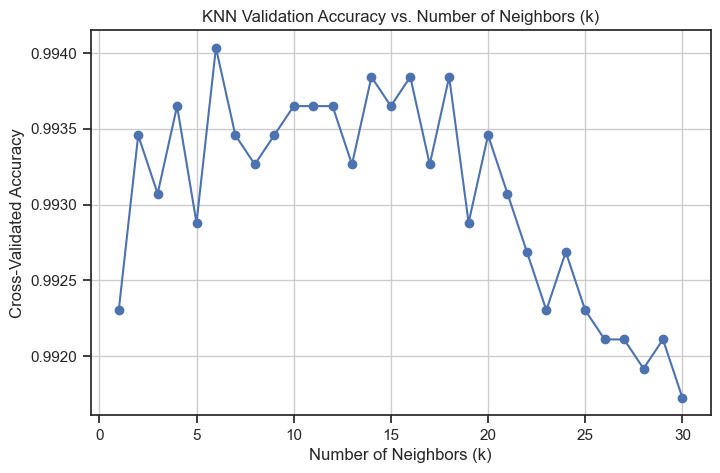

In [88]:
# plot validation acc. vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Validation Accuracy vs. Number of Neighbors (k)')
plt.grid()
plt.show()

#### 8.1.1. fit & predict & evaluate knn model

In [89]:
# use best k to fit knn on train dataset & predict on test dataset & eval
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k,
                                     weights='distance'
                                    )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9946153846153846

In [90]:
# print(classification_report(y_test, y_pred, digits = 4))

### 8.2 Decision Tree

best_param: {'max_depth': 11}
best_accracy_validation: 0.9840301325238766


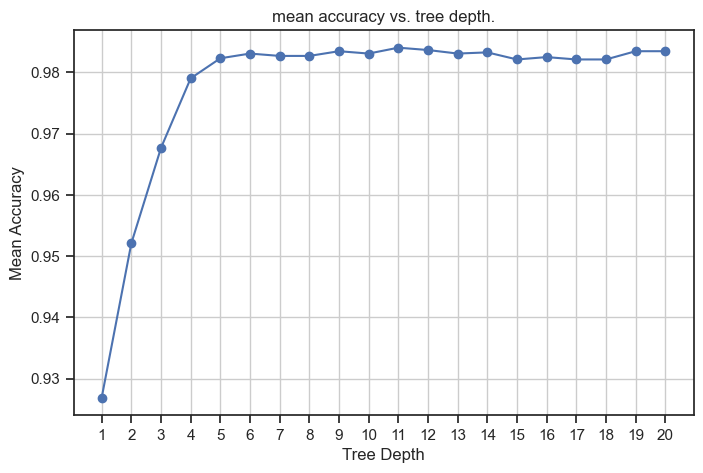

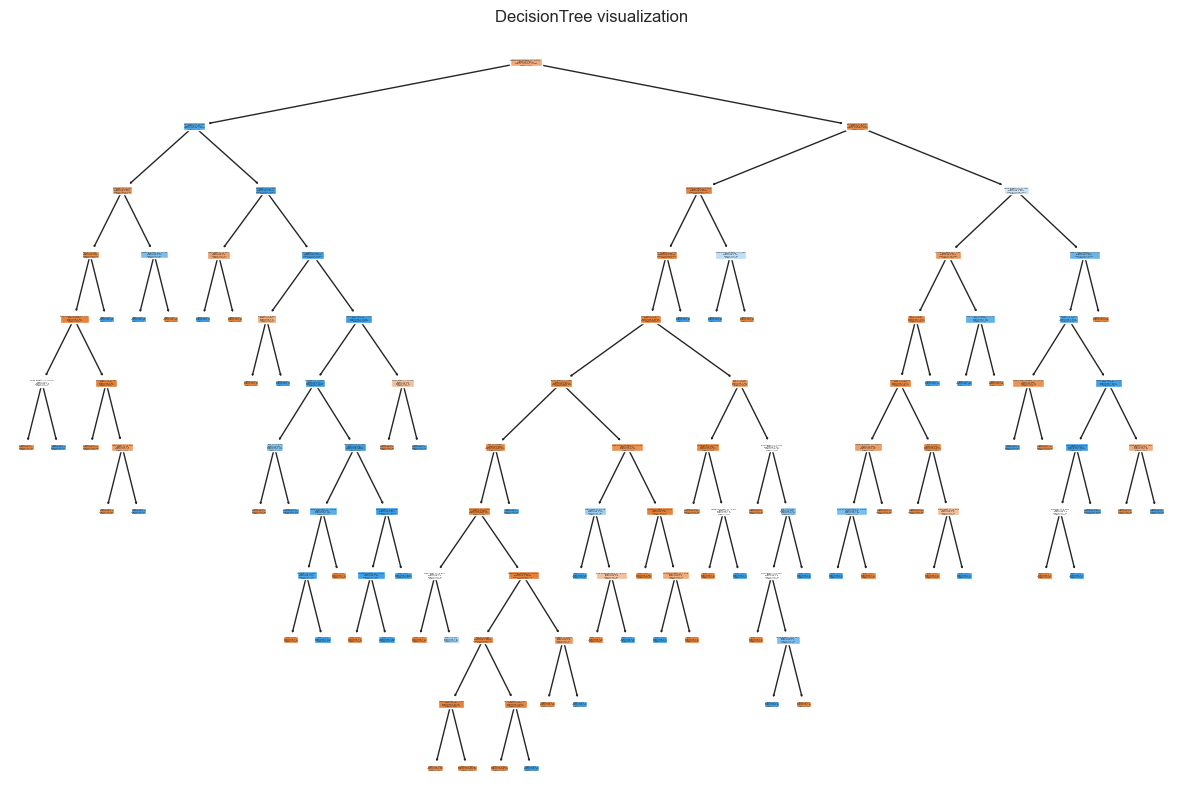

test_accuracy: 0.9846
DT rule:
|--- total sulfur dioxide <= -0.87
|   |--- chlorides <= -0.27
|   |   |--- density <= -0.10
|   |   |   |--- pH <= 3.34
|   |   |   |   |--- total sulfur dioxide <= -1.80
|   |   |   |   |   |--- fixed acidity <= -0.51
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- fixed acidity >  -0.51
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- total sulfur dioxide >  -1.80
|   |   |   |   |   |--- chlorides <= -0.30
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- chlorides >  -0.30
|   |   |   |   |   |   |--- citric acid <= -0.09
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- citric acid >  -0.09
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- pH >  3.34
|   |   |   |   |--- class: 1.0
|   |   |--- density >  -0.10
|   |   |   |--- residual sugar <= -0.15
|   |   |   |   |--- class: 1.0
|   |   |   |--- residual sugar >  -0.15
|   |   |   |   |--- class: 0.0
|   |--- chlorides

In [91]:

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': np.arange(1, 21)
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("best_param:", grid_search.best_params_)
print("best_accracy_validation:", grid_search.best_score_)

mean_test_scores = grid_search.cv_results_['mean_test_score']
depths = param_grid['max_depth']

plt.figure(figsize=(8, 5))
plt.plot(depths, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Accuracy')
plt.title('mean accuracy vs. tree depth.')
plt.xticks(np.arange(min(depths), max(depths) + 1, 1))
plt.grid()
plt.show()

best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(best_dt, feature_names=list(X_train.columns), class_names=list(np.unique(y).astype(str)), filled=True)
plt.title("DecisionTree visualization")
plt.show()

y_pred = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('test_accuracy:',round(test_accuracy,4))

# export dtc rules as text
tree_rules = export_text(best_dt, feature_names=list(X_train.columns))
print("DT rule:")
print(tree_rules)

# export as Graphviz format
# dot_data = export_graphviz(best_dt, out_file=None, feature_names=X_train.columns, class_names=np.unique(y).astype(str),
#                            filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render("./savepic/dt-dataset1") 
# graph.view()

### 8.3 RandomForestClassifier

best_params_: {'max_depth': None, 'n_estimators': 100}
best_accuracy_validation： 0.9946


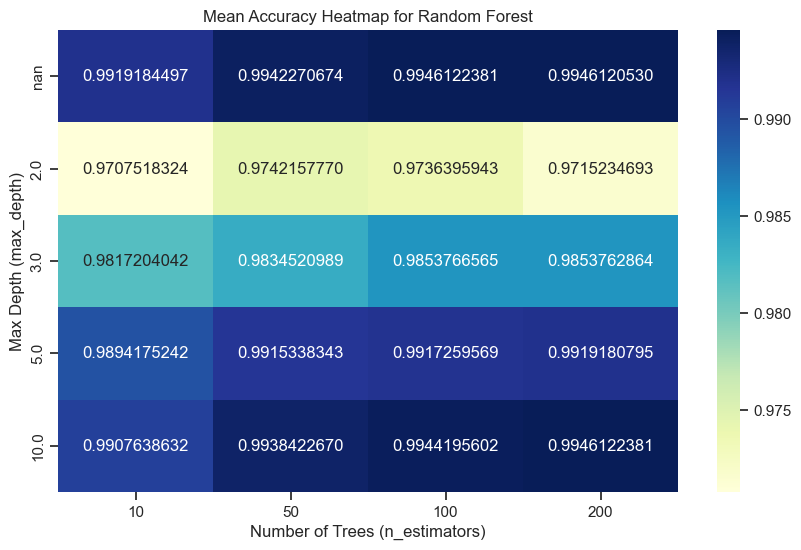

test_accuracy: 0.9969


In [92]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 3, 5, 10, None],  
    'n_estimators': [10, 50, 100, 200]  
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("best_params_:", grid_search.best_params_)
print("best_accuracy_validation：", round(grid_search.best_score_,4))

results = pd.DataFrame(grid_search.cv_results_)

pivot_table = results.pivot(
    index='param_max_depth', 
    columns='param_n_estimators', 
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".10f", cmap="YlGnBu")
plt.title('Mean Accuracy Heatmap for Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Max Depth (max_depth)')
plt.show()

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"test_accuracy: {test_accuracy:.4f}")

# PART II: abalone dataset

## 1. load data

In [160]:
#Columns/Features
F = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'] 
T = 'Rings' # label/target
FT = F + [T]
#Loading Data set
abalone = pd.read_csv("./abalone.csv", sep=',',header=None, names=FT)
abalone.head(10)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   M   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   F   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
5         0.120      8  
6         0.330     20  
7         0.260     16  
8         0.165      9  
9         0.320     19

## 2. explore & describe data

In [161]:
# describe the overiew of data
print(f'Data: shape={abalone[F].shape}')
display(abalone[F].describe())
display(abalone[F].head())

Data: shape=(4177, 8)


Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight  
count     4177.000000   4177.000000  
mean         0.180594      0.238831  
std          0.109614      0.139203  
min          0.000500      0.001500  
25%          0.093500      0.130000  
50%          0.171000      0.234000  
75%          0.253000      0.329000  
max          0.760000      1.005000

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055

In [162]:
# categorical encoding for 'Sex'
# abalone['Sex'] = pd.Categorical(abalone['Sex']).codes
# abalone.head()

# onehot encoding for 'Sex'
one_hot = pd.get_dummies(abalone['Sex'], prefix='Sex')
one_hot = one_hot.astype(int)
abalone = pd.concat([abalone.drop('Sex', axis=1), one_hot], axis=1)
F = [col for col in list(abalone.columns) if col != T]
print(F)
abalone.head()

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']


Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0

In [163]:
abalone[T]

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [164]:
display(abalone[T].value_counts()) # label distribution

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

## 3. cleanse abnormal and address null data

In [165]:
abalone.isnull().sum()
# no null data

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

In [166]:
# check abnormal max/min val
i = 0
for col in abalone.columns:
    if col not in ['Rings','Sex']:
        i+=1; print('*'*10 + str(i) + col + '*'*10)
        wx = abalone[col].sort_values(ascending=False)
        print(pd.concat([wx.head(10), wx.tail(10)]))

**********1Length**********
1428    0.815
2334    0.800
1209    0.780
3715    0.780
2090    0.775
1763    0.775
4148    0.770
2625    0.770
1762    0.770
2624    0.765
526     0.155
2381    0.155
719     0.150
3899    0.140
1429    0.140
1986    0.135
2114    0.130
237     0.130
238     0.110
236     0.075
Name: Length, dtype: float64
**********2Diameter**********
1428    0.650
1209    0.630
2334    0.630
1763    0.630
1207    0.625
1762    0.620
3008    0.615
1427    0.610
4148    0.605
3427    0.605
526     0.110
696     0.105
1429    0.105
3837    0.105
3899    0.105
719     0.100
237     0.100
2114    0.095
238     0.090
236     0.055
Name: Diameter, dtype: float64
**********3Height**********
2051    1.130
1417    0.515
1763    0.250
1428    0.250
2179    0.250
307     0.240
1528    0.240
277     0.240
2161    0.240
3993    0.235
3190    0.025
720     0.025
719     0.025
3902    0.020
694     0.020
1174    0.015
2169    0.015
236     0.010
1257    0.000
3996    0.000
Name: Height, 

## 4. select features to be used

In [167]:
stats = {
    "Max": abalone.max(),
    "Min": abalone.min(),
    "Mean": abalone.mean(),
    "Median": abalone.median(),
    "Variance": abalone.var(),
    "Skewness": abalone.skew(),
    "Kurtosis": abalone.kurtosis()
}

stats_table = pd.DataFrame(stats)
stats_table

Max     Min      Mean  Median   Variance  Skewness  \
Length           0.8150  0.0750  0.523992  0.5450   0.014422 -0.639873   
Diameter         0.6500  0.0550  0.407881  0.4250   0.009849 -0.609198   
Height           1.1300  0.0000  0.139516  0.1400   0.001750  3.128817   
Whole weight     2.8255  0.0020  0.828742  0.7995   0.240481  0.530959   
Shucked weight   1.4880  0.0010  0.359367  0.3360   0.049268  0.719098   
Viscera weight   0.7600  0.0005  0.180594  0.1710   0.012015  0.591852   
Shell weight     1.0050  0.0015  0.238831  0.2340   0.019377  0.620927   
Rings           29.0000  1.0000  9.933684  9.0000  10.395266  1.114102   
Sex_F            1.0000  0.0000  0.312904  0.0000   0.215047  0.807302   
Sex_I            1.0000  0.0000  0.321283  0.0000   0.218113  0.765708   
Sex_M            1.0000  0.0000  0.365813  0.0000   0.232049  0.557390   

                 Kurtosis  
Length           0.064621  
Diameter        -0.045476  
Height          76.025509  
Whole weight    -0.023644  
Shucked weight   0.595124  
Viscera weight   0.084012  
Shell weight     0.531926  
Rings            2.330687  
Sex_F           -1.348909  
Sex_I           -1.414369  
Sex_M           -1.690126

/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


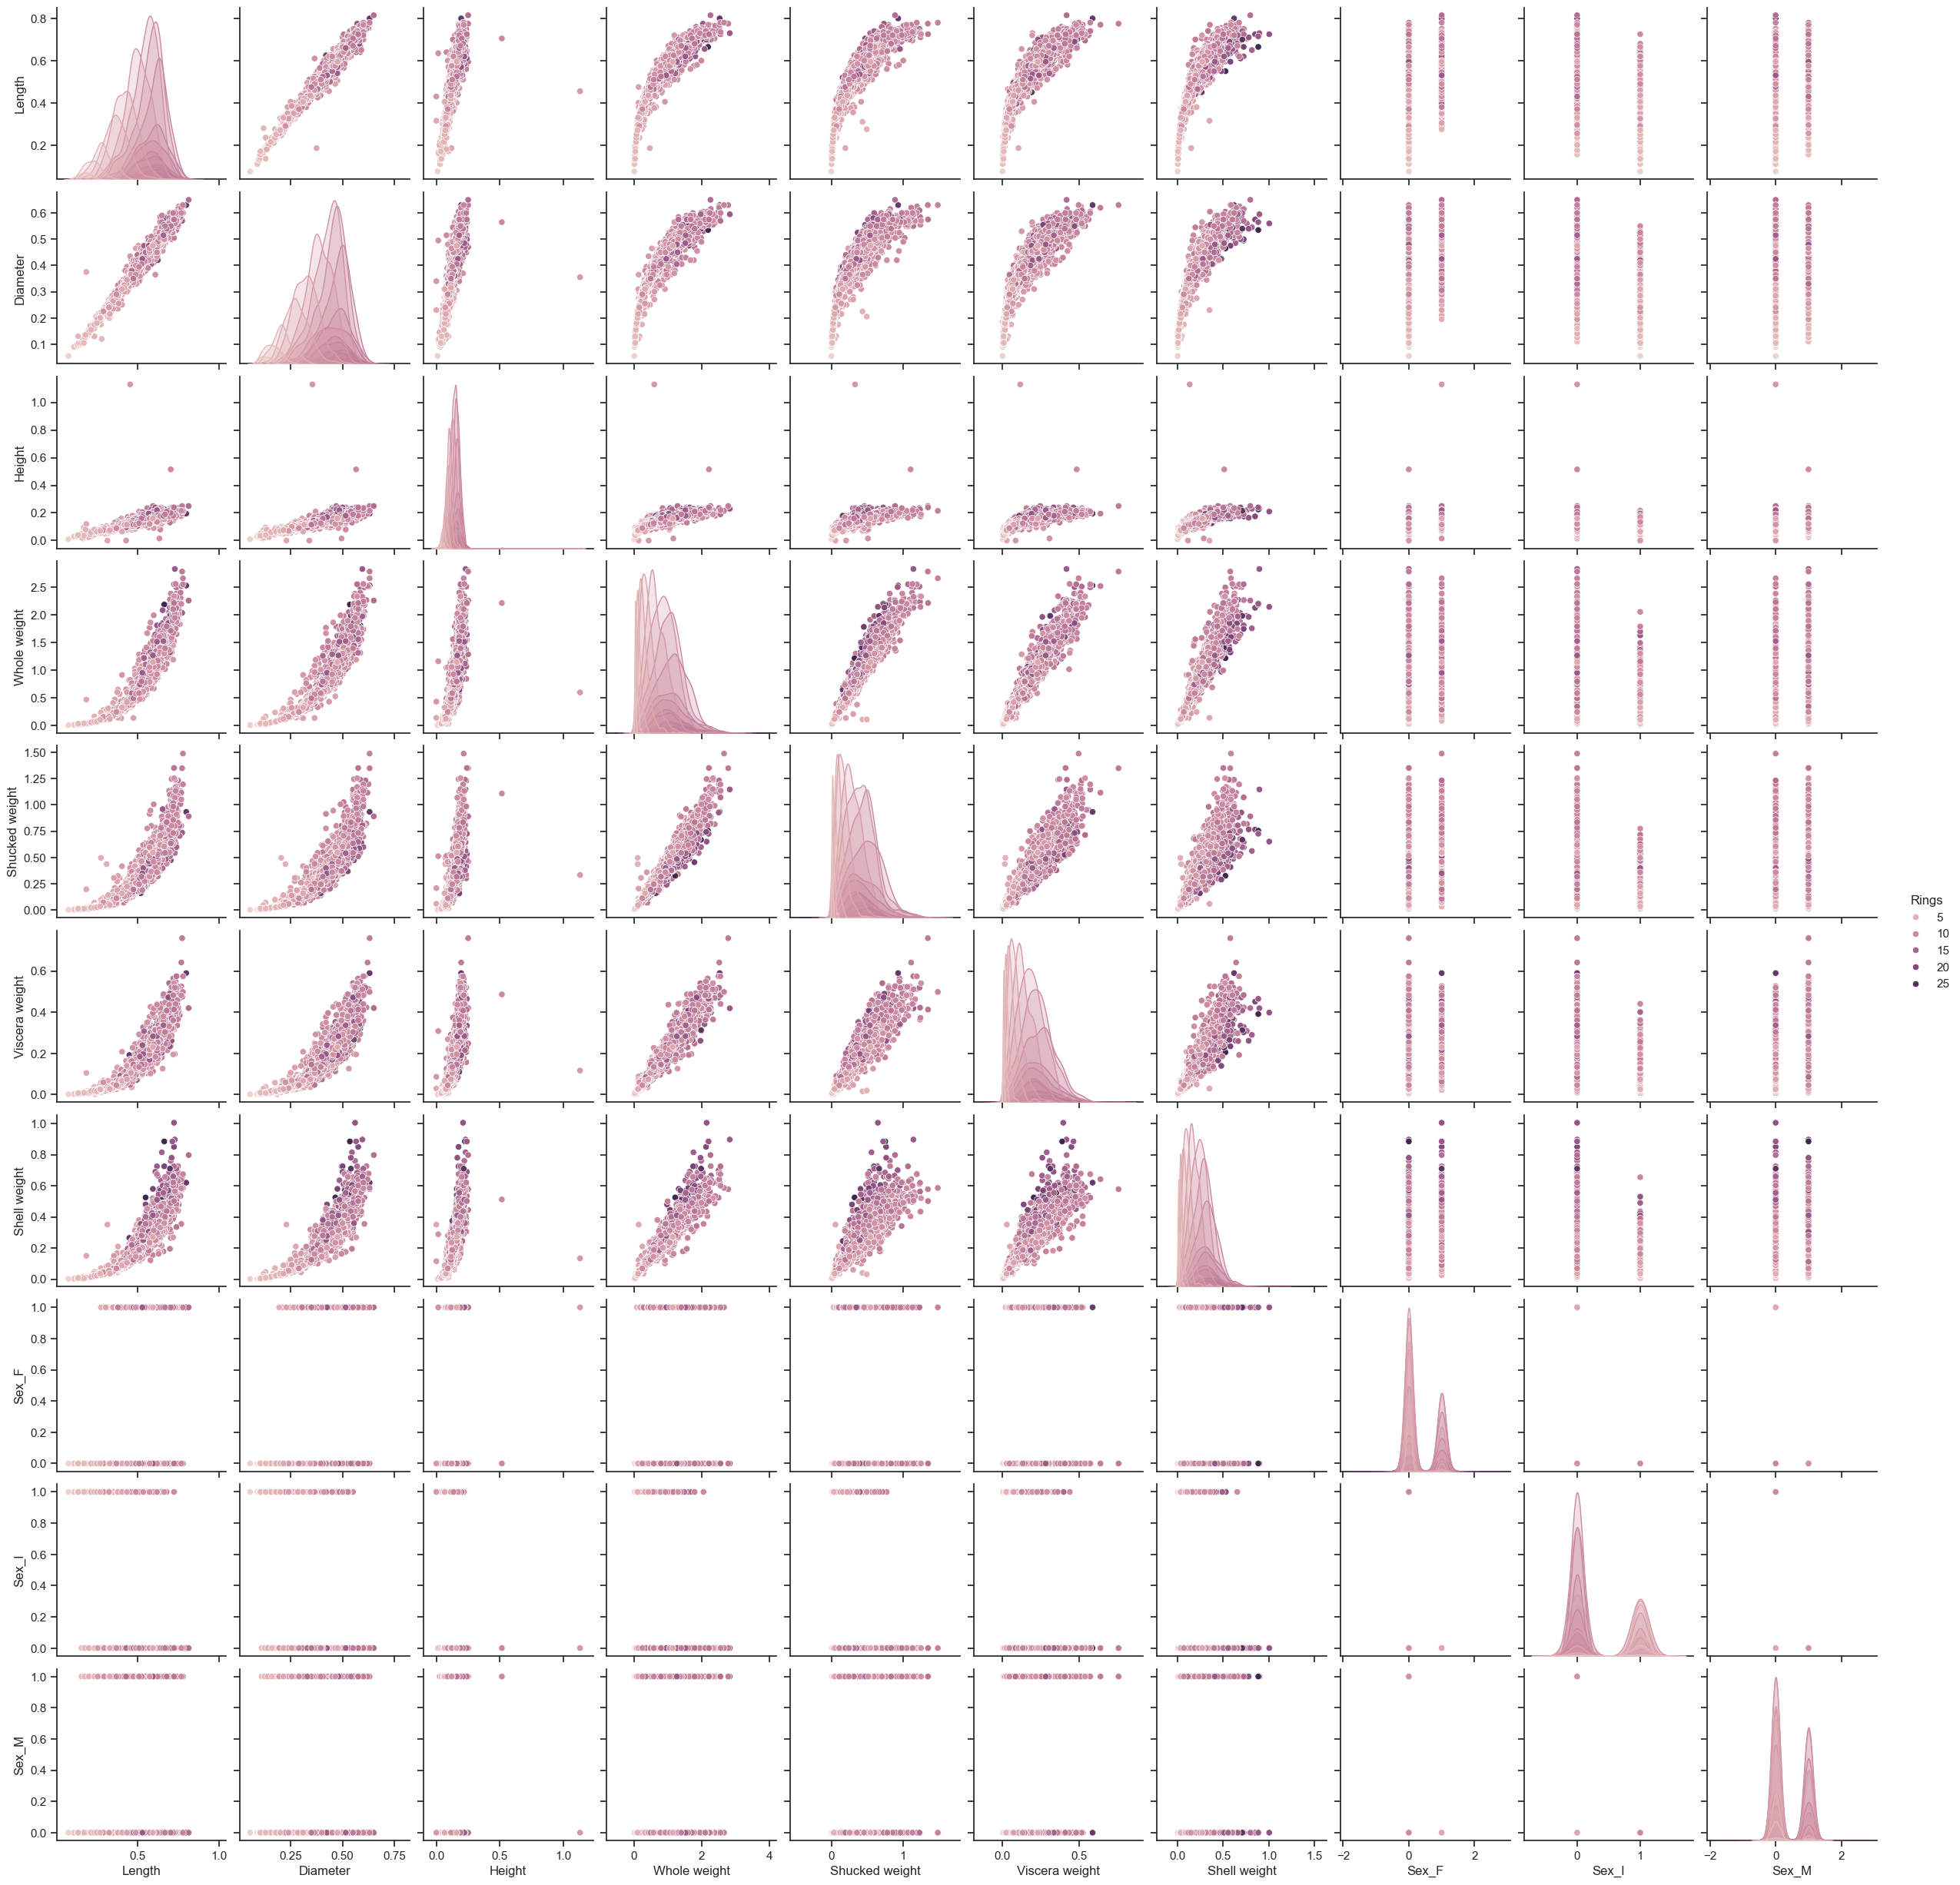

In [129]:
pairplot_feat = list(abalone.columns)

sampled_data = abalone.sample(
                        frac=1, # randomly use part of data
                           random_state=42)[pairplot_feat]
display(sns.pairplot(sampled_data
                     , hue = 'Rings'
                    ))

In [168]:
# remove some feats, R is None meaning reserve all features
R = [
    # 'chlorides',
     # 'density',
    # 'total sulfur dioxide'
]
F_used = [feat for feat in F if feat not in R and feat != T]
X_used, y = abalone[F_used], np.ravel(abalone[T]) #labels (color)
print(f'Data: shape={X_used.shape}')
print(f'Labels: shape={y.shape}')
X_used.columns

Data: shape=(4177, 10)
Labels: shape=(4177,)


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

## 5. normalize features

In [169]:
# different normalization
# 0. no normalization
# X = X_used
# 1. minmax normalization
# scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(X_used), columns=F_used)
# 2. z-score normalization
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_used), columns=F_used)

## 6. Create Train/Test Split 

In [149]:
ran = 42 # gurantee there is same train dataset and test dataset
train_size = .8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state = ran) 

## 7. check & address data imbalance

In [150]:
# don't imbalance on abalone

# print(wine[C].value_counts())

# print(y.value_counts())

# balance has negative effect
# smote = SMOTE(random_state=42,sampling_strategy=0.8)
# X_train, y_train = smote.fit_resample(X_train, y_train)

## 8. cross validation & get best k

### 8.1 KNN

In [151]:
# k-fold cross validation and get best super-paramater
k_values = range(1,31)
cv_scores = []
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train,cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print('best_k = ', best_k)

/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only

best_k =  21


/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


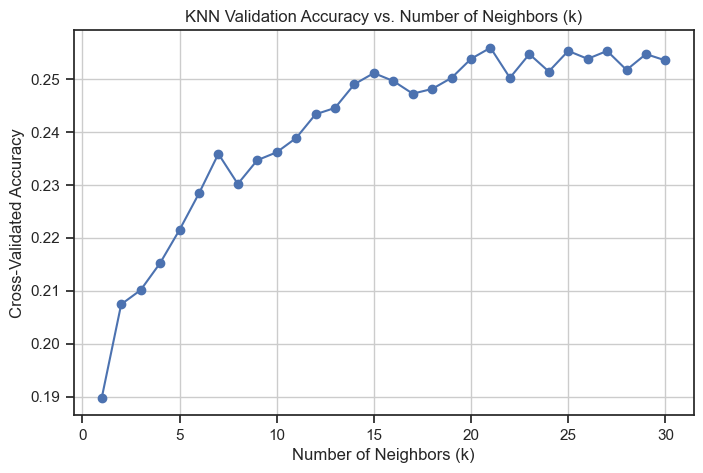

In [152]:
# plot validation acc. vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Validation Accuracy vs. Number of Neighbors (k)')
plt.grid()
plt.show()

#### 8.1.1. fit & predict & evaluate knn model

In [159]:
# use best k to fit knn on train dataset & predict on test dataset & eval
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k,
                                     # weights='distance'
                                    )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.2751196172248804

### 8.2 Decision Tree

/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best_param: {'max_depth': 5}
best_accracy_validation: 0.2642853306839236


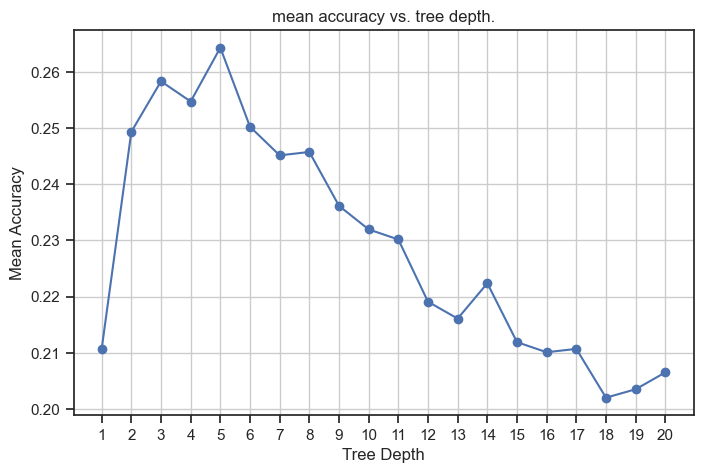

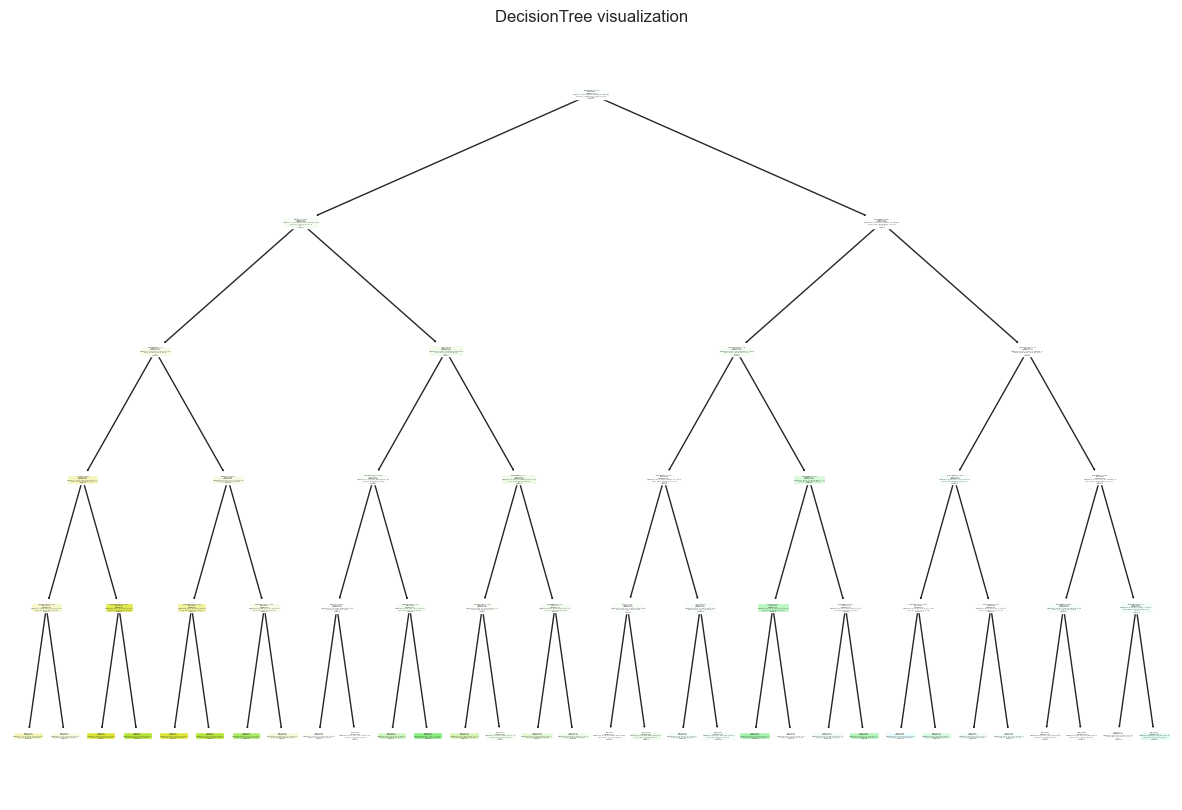

test_accuracy: 0.2823
DT rule:
|--- Shell weight <= -0.68
|   |--- Diameter <= -1.87
|   |   |--- Shell weight <= -1.56
|   |   |   |--- Length <= -2.34
|   |   |   |   |--- Viscera weight <= -1.53
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- Viscera weight >  -1.53
|   |   |   |   |   |--- class: 5
|   |   |   |--- Length >  -2.34
|   |   |   |   |--- Shucked weight <= -1.45
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- Shucked weight >  -1.45
|   |   |   |   |   |--- class: 5
|   |   |--- Shell weight >  -1.56
|   |   |   |--- Diameter <= -2.42
|   |   |   |   |--- Shucked weight <= -1.36
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- Shucked weight >  -1.36
|   |   |   |   |   |--- class: 5
|   |   |   |--- Diameter >  -2.42
|   |   |   |   |--- Shucked weight <= -1.50
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- Shucked weight >  -1.50
|   |   |   |   |   |--- class: 5
|   |--- Diameter >  -1.87
|   |   |--- Sex_I <= 0.38
|   |   |   |--- Shucke

In [154]:

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': np.arange(1, 21)
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("best_param:", grid_search.best_params_)
print("best_accracy_validation:", grid_search.best_score_)

mean_test_scores = grid_search.cv_results_['mean_test_score']
depths = param_grid['max_depth']

plt.figure(figsize=(8, 5))
plt.plot(depths, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Accuracy')
plt.title('mean accuracy vs. tree depth.')
plt.xticks(np.arange(min(depths), max(depths) + 1, 1))
plt.grid()
plt.show()

# use best paras to retrain dtc
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# # plot dtc
plt.figure(figsize=(15, 10))
plot_tree(best_dt, feature_names=list(X_train.columns), class_names=list(np.unique(y).astype(str)), filled=True)
plt.title("DecisionTree visualization")
plt.show()

y_pred = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('test_accuracy:',round(test_accuracy,4))

# export dtc rules as text

tree_rules = export_text(best_dt, feature_names=list(X_train.columns))
print("DT rule:")
print(tree_rules)

# export as Graphviz format
# dot_data = export_graphviz(best_dt, out_file=None, feature_names=X_train.columns, class_names=np.unique(y).astype(str),
#                            filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render("./savepic/dt-dataset2")  # save PDF files
# graph.view()

### 8.3 RandomForestClassifier

/opt/homebrew/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best_params_: {'max_depth': 5, 'n_estimators': 10}
best_accuracy_validaiton： 0.2664


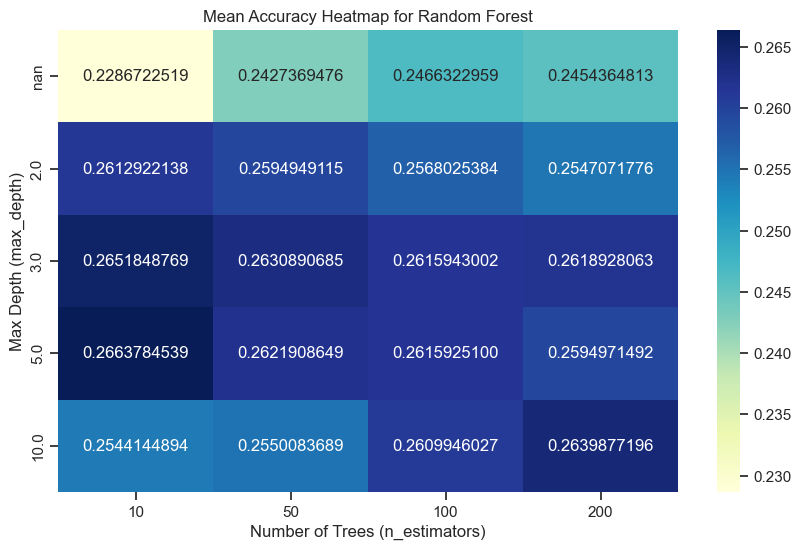

test_accuracy: 0.2990


In [155]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [2, 3, 5, 10, None],  
    'n_estimators': [10, 50, 100, 200]  # # of trees in the rf
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("best_params_:", grid_search.best_params_)
print("best_accuracy_validaiton：", round(grid_search.best_score_,4))

results = pd.DataFrame(grid_search.cv_results_)

pivot_table = results.pivot(
    index='param_max_depth', 
    columns='param_n_estimators', 
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".10f", cmap="YlGnBu")
plt.title('Mean Accuracy Heatmap for Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Max Depth (max_depth)')
plt.show()

# get best model
best_rf = grid_search.best_estimator_

# test dataset
y_pred = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"test_accuracy: {test_accuracy:.4f}")